# Descriptive Statistics

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis. We've already seen several examples of deceptive statistics in earlier lessons, such as means and medians. In this lesson, we'll review some of these functions and explore several new ones.

## Measures of Center

Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.
The mean is simply an average: the sum of the values divided by the total number of records. As we've seen in previous lessons we can use df.mean() to get the mean of each column in a DataFrame:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('mtcars.csv')
df = df.rename(columns={'Unnamed: 0':'model'})
df.index = df.model
df.drop(columns='model', inplace=True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.mean() # mean(axis=1) to calculate the mean of values in a row

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it. As we've seen previously, you can get the median using the df.median() function:

In [4]:
df.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [5]:
df.median()['mpg']

19.2

In [6]:
for i in df.median().index:
    print(f"{i} --> {df.median()[i]:.2f}")

mpg --> 19.20
cyl --> 6.00
disp --> 196.30
hp --> 123.00
drat --> 3.70
wt --> 3.33
qsec --> 17.71
vs --> 0.00
am --> 0.00
gear --> 4.00
carb --> 2.00


In [7]:
for i in df.columns:
    df[i].fillna(value=df[i].median(), inplace=True)

#### Generating a normal distribution data and plotting mean and median

In [8]:
norm_dist = pd.DataFrame(np.random.normal(size=100000))

In [9]:
#norm_dist.size

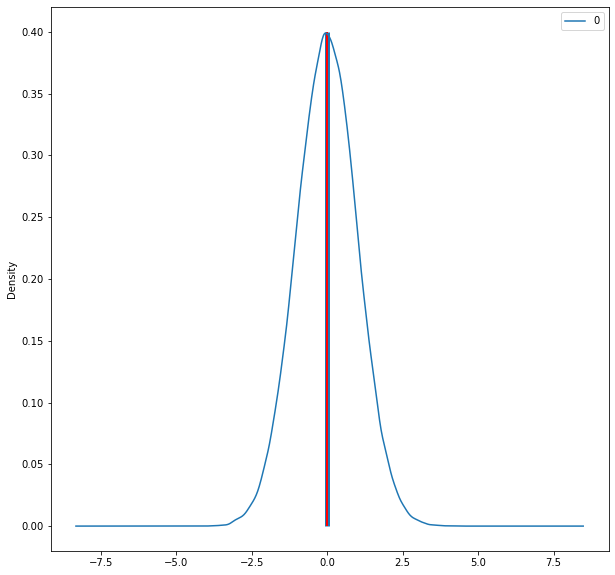

In [10]:
norm_dist.plot(kind='density', figsize=(10,10));

plt.vlines(norm_dist.mean(),ymin=0,ymax=0.4,linewidth=5); # Black line for mean
plt.vlines(norm_dist.median(),ymin=0,ymax=0.4,linewidth=2,color='red'); # median

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:

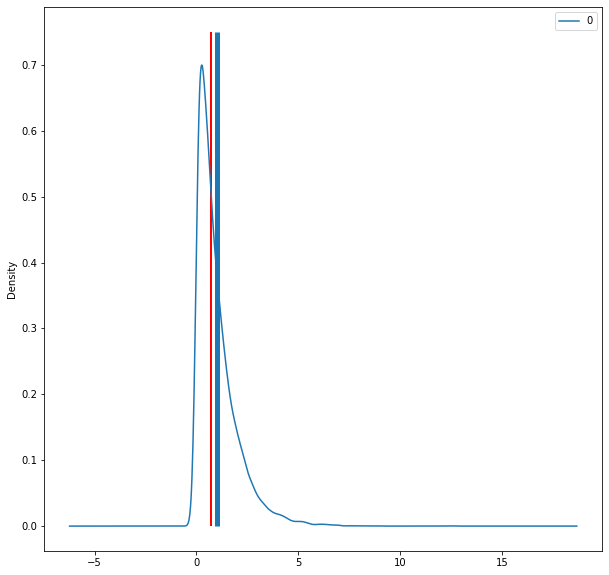

In [11]:
skewed_dist = pd.DataFrame(np.random.exponential(size=10000))

skewed_dist.plot(kind='density',figsize=(10,10));

plt.vlines(skewed_dist.mean(),ymin=0, ymax=0.75,linewidth=5); # blue line for mean
plt.vlines(skewed_dist.median(), ymin=0, ymax=0.75, linewidth=2,color='red'); #median

#### Measure of spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [12]:
# Range

df['mpg'].max() - df['mpg'].min()

23.5

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [13]:
# Five numbers of summary
quantiles = [df['mpg'].quantile(0),
             df['mpg'].quantile(0.25),
             df['mpg'].quantile(0.5),
             df['mpg'].quantile(0.75),
             df['mpg'].quantile(1)
            ]
quantiles

[10.4, 15.425, 19.2, 22.8, 33.9]

In [14]:
df['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

#### IQR
Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile

<AxesSubplot:>

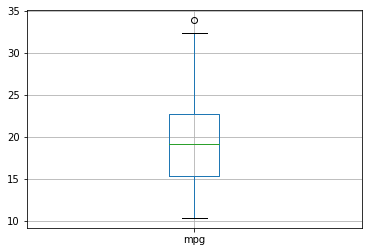

In [15]:
df.boxplot(column='mpg')

#### Variance and Standard Deviation

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean.

The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared

In [16]:
var = df.mpg.var()
std = df.mpg.std()
print(f'Variance --> {var:0.2f}')
print(f'Standard deviation --> {std:0.2f}')

Variance --> 36.32
Standard deviation --> 6.03


#### Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures how much data is in the tails of a distribution v.s. the center.

In [17]:
skewness = df['mpg'].skew()
kurtosis = df['mpg'].kurt()

print(f'Skewness  ---> {skewness:.2f}')
print(f'Kurtosis  ---> {kurtosis:.2f}')

Skewness  ---> 0.67
Kurtosis  ---> -0.02


In [18]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

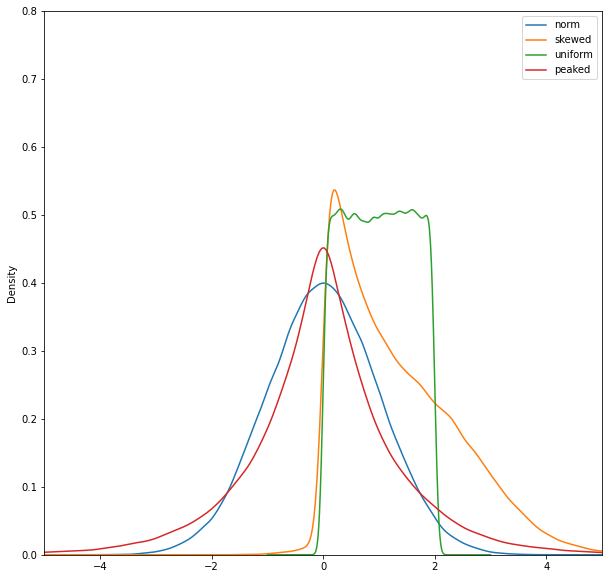

In [19]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5),ylim=(0,0.8));

the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis and the two distributions with more data in the tails vs the center have higher kurtosis.

#### Correlation between features

In [20]:
# qty_purchased=[10, 20, 30, 40]
# discount=[15, 20, 35, 55]

# df = pd.DataFrame(qty_purchased,discount)

# df.plot(kind='line', xlabel='Discount in %', ylabel='Qty purchased', title='Correlation between Discount and Qty purchased');

Text(0.5, 1.0, 'Correlation between Discount and Qty purchased')

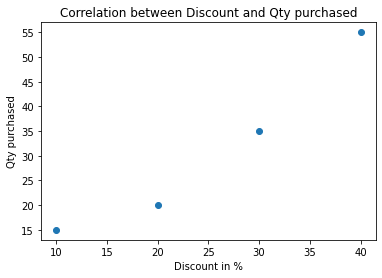

In [21]:
data = {'qty_purchased': [10, 20, 30, 40], 'discount':[15, 20, 35, 55]}

df = pd.DataFrame(data=data)
plt.scatter(x=df['qty_purchased'],y=df['discount'])
plt.xlabel('Discount in %')
plt.ylabel('Qty purchased')
plt.title('Correlation between Discount and Qty purchased')

There is a positive correlation between % of discount and Qty purchased meaning as the discount increases, qty purchased by customer also increases